In [1]:
# # install pytorch and torchvision
# !pip3 install torchvision==0.2.2
# !pip3 install torch==1.0.0 -f https://download.pytorch.org/whl/cu92/stable
!pip3 install https://download.pytorch.org/whl/cu100/torch-1.1.0-cp37-cp37m-linux_x86_64.whl

ERROR: torch-1.1.0-cp37-cp37m-linux_x86_64.whl is not a supported wheel on this platform.


In [0]:
!pip install --upgrade matplotlib 

     |████████████████████████████████| 13.1MB 3.4MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: matplotlib 3.0.3
    Uninstalling matplotlib-3.0.3:
      Successfully uninstalled matplotlib-3.0.3


In [0]:
# install pydrive to access imagenet stored in googledrive
!pip install -U -q pydrive

     |████████████████████████████████| 993kB 2.8MB/s 


In [0]:
# import librarys to access googledrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth, drive
from oauth2client.client import GoogleCredentials

# import pytorch and related packages
import torch
import torchvision
from torchvision import transforms

# import common packages
import os

In [0]:
# mount googledrive
drive.mount('./Drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at ./Drive


In [0]:
import math

import torch
import torch.nn as nn
from torch.autograd import Variable

defaultcfg = {
    11 : [64, 'M', 128, 'M', 256, 256, 'M', 512, 512, 'M', 512, 512],
    13 : [64, 64, 'M', 128, 128, 'M', 256, 256, 'M', 512, 512, 'M', 512, 512],
    16 : [64, 64, 'M', 128, 128, 'M', 256, 256, 256, 'M', 512, 512, 512, 'M', 512, 512, 512],
    19 : [64, 64, 'M', 128, 128, 'M', 256, 256, 256, 256, 'M', 512, 512, 512, 512, 'M', 512, 512, 512, 512],
}

class vgg(nn.Module):
    def __init__(self, dataset='cifar10', depth=19, init_weights=True, cfg=None):
        super(vgg, self).__init__()
        if cfg is None:
            cfg = defaultcfg[depth]

        self.cfg = cfg

        self.feature = self.make_layers(cfg, True)

        if dataset == 'cifar10':
            num_classes = 10
        elif dataset == 'cifar100':
            num_classes = 100
        self.classifier = nn.Sequential(
              nn.Linear(cfg[-1], 512),
              nn.BatchNorm1d(512),
              nn.ReLU(inplace=True),
              nn.Linear(512, num_classes)
            )
        if init_weights:
            self._initialize_weights()

    def make_layers(self, cfg, batch_norm=False):
        layers = []
        in_channels = 3
        for v in cfg:
            if v == 'M':
                layers += [nn.MaxPool2d(kernel_size=2, stride=2)]
            else:
                conv2d = nn.Conv2d(in_channels, v, kernel_size=3, padding=1, bias=False)
                if batch_norm:
                    layers += [conv2d, nn.BatchNorm2d(v), nn.ReLU(inplace=True)]
                else:
                    layers += [conv2d, nn.ReLU(inplace=True)]
                in_channels = v
        return nn.Sequential(*layers)

    def forward(self, x):
        x = self.feature(x)
        x = nn.AvgPool2d(2)(x)
        x = x.view(x.size(0), -1)
        y = self.classifier(x)
        return y

    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                n = m.kernel_size[0] * m.kernel_size[1] * m.out_channels
                m.weight.data.normal_(0, math.sqrt(2. / n))
                if m.bias is not None:
                    m.bias.data.zero_()
            elif isinstance(m, nn.BatchNorm2d):
                m.weight.data.fill_(0.5)
                m.bias.data.zero_()
            elif isinstance(m, nn.Linear):
                m.weight.data.normal_(0, 0.01)
                m.bias.data.zero_()

In [0]:
print(torch.cuda.device_count())
print (torch.cuda.get_device_name(0))

1
Tesla K80


In [0]:

if not os.path.exists('/content/dsfinal'):
    !git clone https://github.com/luk1684tw/dsfinal.git
%cd /content/dsfinal
!git pull
os.getcwd()

/content/dsfinal
Already up to date.


'/content/dsfinal'

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
modelRoot = '/content/Drive/My Drive/Colab Notebooks/models/scratchB'
%cd l1-norm-pruning/

def plot_kernels(tensor, num_cols=6):
#     print(tensor.shape)
    tn = tensor.view(1, tensor.shape[0]*tensor.shape[1]*tensor.shape[2]*tensor.shape[3]).numpy()

    return tn[0]

/content/dsfinal/l1-norm-pruning


[INFO] Loading model from /content/Drive/My Drive/Colab Notebooks/models/scratchB/modelB500_best.pth.tar
Old model features:  10
[INFO] In Features 512


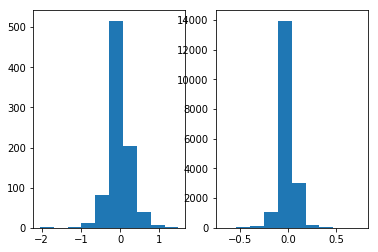

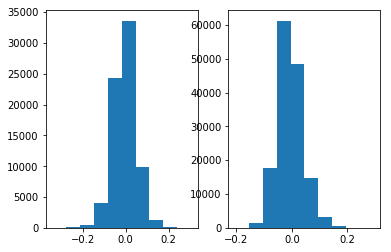

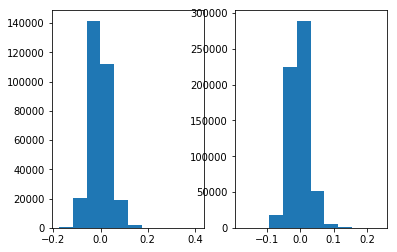

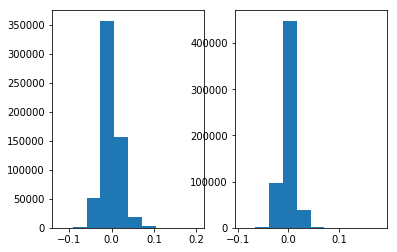

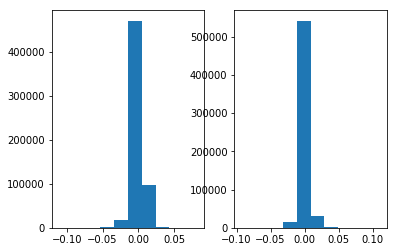

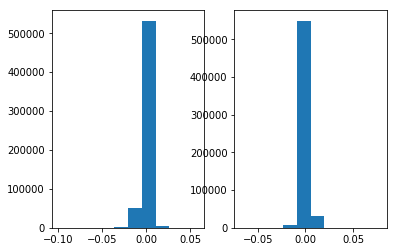

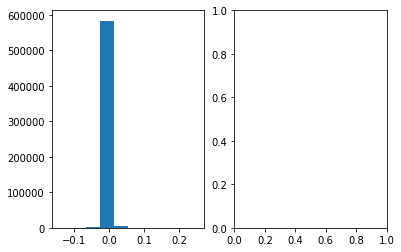

In [0]:
model = vgg(depth=16, cfg=checkpoint['cfg'])
modelPath = '/content/Drive/My Drive/Colab Notebooks/models/scratchB/modelB500_best.pth.tar'
print ('[INFO] Loading model from', modelPath)
checkpoint = torch.load(modelPath)
oldmodel = vgg(depth=16, cfg=checkpoint['cfg'])
oldmodel.load_state_dict(checkpoint['state_dict'])
print('Old model features: ', model.classifier[-1].out_features) 
for [m1, m2] in zip(model.modules(), oldmodel.modules()):
    if isinstance(m1, nn.Conv2d):
        m1.weight.data = m2.weight.data.clone()
    elif isinstance(m1, nn.BatchNorm2d):
        m1.weight.data = m2.weight.data.clone()
        m1.bias.data = m2.bias.data.clone()
        m1.running_mean = m2.running_mean.clone()
        m1.running_var = m2.running_var.clone()
# Freeze training for all layers
for param in model.feature.parameters():
    param.require_grad = False

# class_names = ['NORMAL', 'PNEUMONIA']
# Newly created modules have require_grad=True by default
num_features = model.classifier[-1].in_features
print ('[INFO] In Features', num_features)
features = list(model.classifier.children())[:-1] # Remove last layer
features.extend([nn.Linear(num_features, 120)]) # Add our layer with 120 outputs
model.classifier = nn.Sequential(*features) # Replace the model classifier

modelWeights =list()
for m in model.modules():
    if isinstance(m, nn.Conv2d):
        modelWeights.append(plot_kernels(m.weight.data.cpu()))


for idx, weight in enumerate(modelWeights):
    if idx%2 == 0:
        fig, axs = plt.subplots(1, 2)
    col = int(idx%2)
    axs[col].hist(weight) 

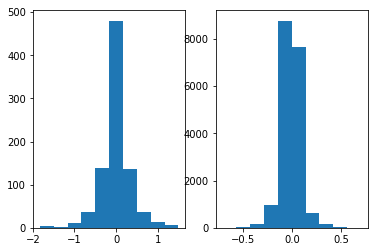

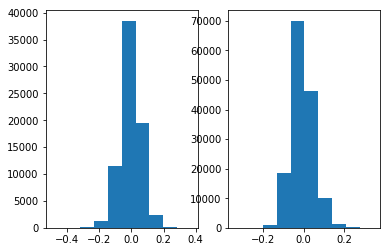

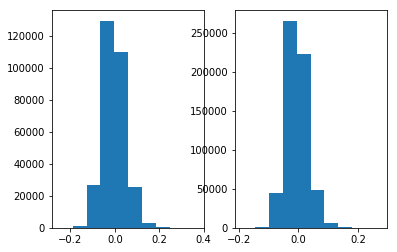

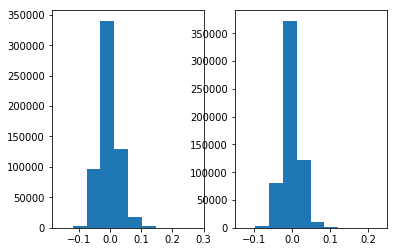

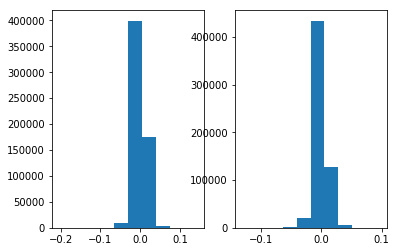

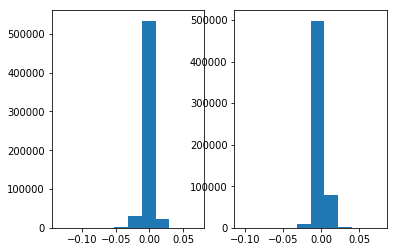

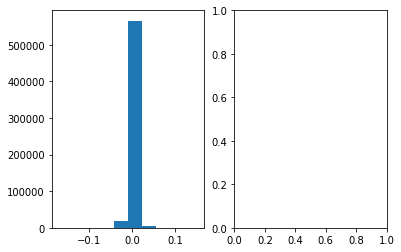

In [0]:
checkPoint = torch.load(os.path.join(modelRoot, 'modelC500_best.pth.tar'))
model = vgg(depth=16, cfg=checkPoint['cfg'])
# help (model)

# help (checkPoint)
model.load_state_dict(checkPoint['state_dict'])

modelWeights =list()
for m in model.modules():
    if isinstance(m, nn.Conv2d):
        modelWeights.append(plot_kernels(m.weight.data.cpu()))


for idx, weight in enumerate(modelWeights):
    if idx%2 == 0:
        fig, axs = plt.subplots(1, 2)
    col = int(idx%2)
    axs[col].hist(weight) 

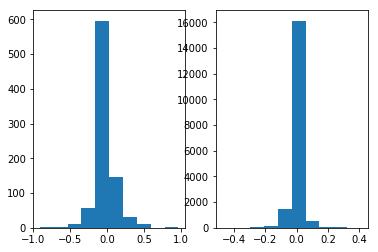

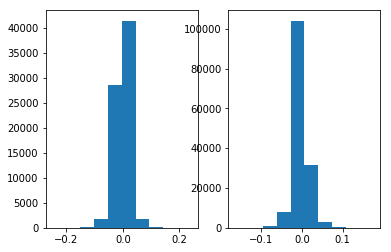

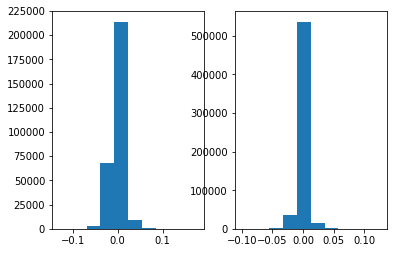

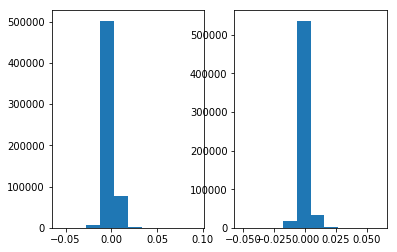

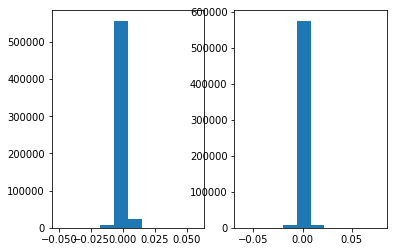

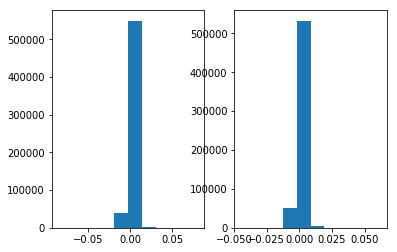

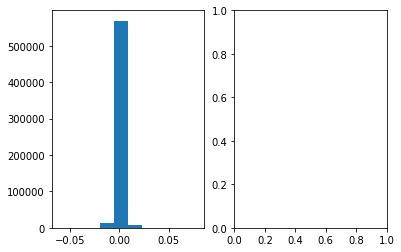

In [0]:

modelRoot = '/content/Drive/My Drive/Colab Notebooks/models/scratchB'
checkPoint = torch.load(os.path.join(modelRoot, 'modelA500_best.pth.tar'))
model = vgg(depth=16, cfg=checkPoint['cfg'])
# help (model)

# help (checkPoint)
model.load_state_dict(checkPoint['state_dict'])

modelWeights =list()
for m in model.modules():
    if isinstance(m, nn.Conv2d):
        modelWeights.append(plot_kernels(m.weight.data.cpu()))


for idx, weight in enumerate(modelWeights):
    if idx%2 == 0:
        fig, axs = plt.subplots(1, 2)
    col = int(idx%2)
    axs[col].hist(weight) 

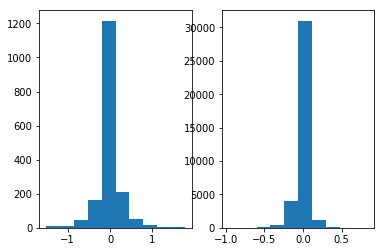

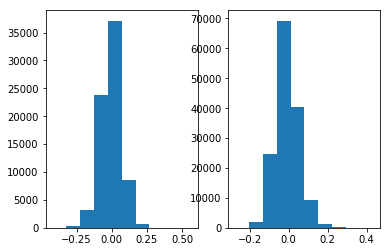

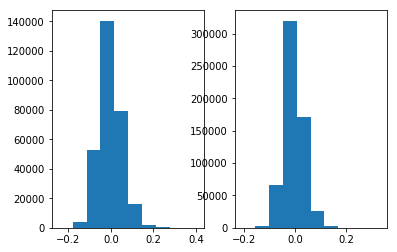

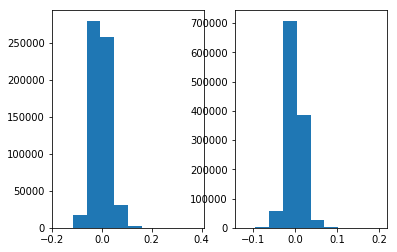

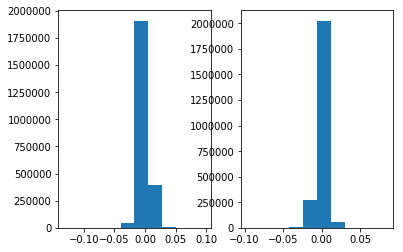

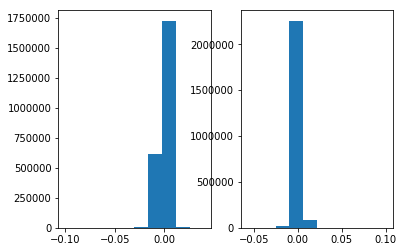

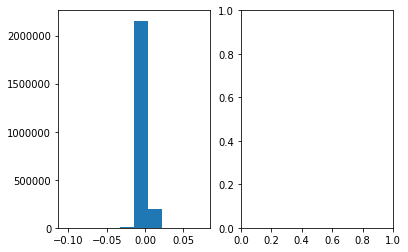

In [0]:
model = vgg(depth=16)
checkPoint = torch.load(os.path.join(modelRoot, 'checkpointDistC100.pth.tar'))
model.load_state_dict(checkPoint['state_dict'])

modelWeights =list()
for m in model.modules():
    if isinstance(m, nn.Conv2d):
        modelWeights.append(plot_kernels(m.weight.data.cpu()))

for idx, weight in enumerate(modelWeights):
    if idx%2 == 0:
        fig, axs = plt.subplots(1, 2)
    col = int(idx%2)
    axs[col].hist(weight) 

In [0]:
model = vgg(depth=16)
checkPoint = torch.load(os.path.join(modelRoot, 'checkpointDistA100.pth.tar'))
model.load_state_dict(checkPoint['state_dict'])

modelWeights =list()
for m in model.modules():
    if isinstance(m, nn.Conv2d):
        modelWeights.append(plot_kernels(m.weight.data.cpu()))

for idx, weight in enumerate(modelWeights):
    if idx%2 == 0:
        fig, axs = plt.subplots(1, 2)
    col = int(idx%2)
    axs[col].hist(weight) 

In [0]:
model = vgg(depth=16)

checkPoint = torch.load(os.path.join(modelRoot, 'checkpointDistB100.pth.tar'))
model.load_state_dict(checkPoint['state_dict'])

modelWeights =list()
for m in model.modules():
    if isinstance(m, nn.Conv2d):
        modelWeights.append(plot_kernels(m.weight.data.cpu()))

for idx, weight in enumerate(modelWeights):
    if idx%2 == 0:
        fig, axs = plt.subplots(1, 2)
    col = int(idx%2)
    axs[col].hist(weight) 

In [0]:
model = vgg(depth=16)
checkPoint = torch.load(os.path.join(modelRoot, 'checkpointDistB100.pth.tar'))
model.load_state_dict(checkPoint['state_dict'])

modelWeights =list()
for m in model.modules():
    if isinstance(m, nn.Conv2d):
        modelWeights.append(plot_kernels(m.weight.data.cpu()))

for idx, weight in enumerate(modelWeights):
    if idx%2 == 0:
        fig, axs = plt.subplots(1, 2)
    col = int(idx%2)
    axs[col].hist(weight) 


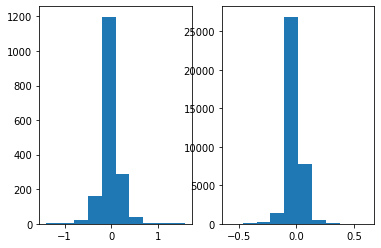

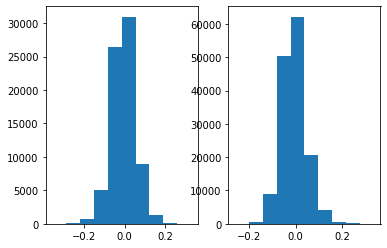

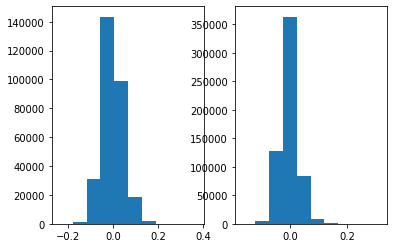

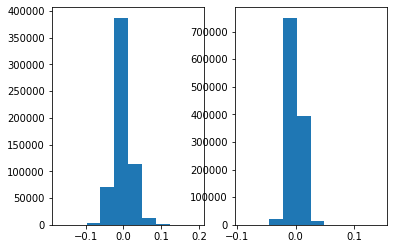

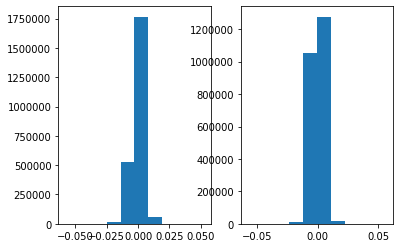

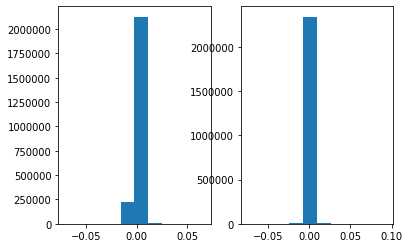

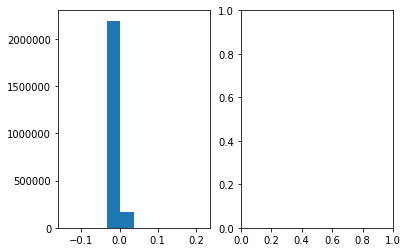

In [0]:
model = vgg(depth=16)
checkPoint = torch.load(os.path.join(modelRoot, 'checkpointDistB500.pth.tar'))
model.load_state_dict(checkPoint['state_dict'])

modelWeights =list()
for m in model.modules():
    if isinstance(m, nn.Conv2d):
        modelWeights.append(plot_kernels(m.weight.data.cpu()))

for idx, weight in enumerate(modelWeights):
    if idx%2 == 0:
        fig, axs = plt.subplots(1, 2)
    col = int(idx%2)
    axs[col].hist(weight) 

In [0]:
model = vgg(depth=16)
# model = torch.load(os.path.join(modelRoot, 'checkpointDistA75.pth.tar'))
checkPoint = torch.load(os.path.join(modelRoot, 'checkpointDistA500.pth.tar'))
model.load_state_dict(checkPoint['state_dict'])

modelWeights =list()
for m in model.modules():
    if isinstance(m, nn.Conv2d):
        modelWeights.append(plot_kernels(m.weight.data.cpu()))

for idx, weight in enumerate(modelWeights):
    if idx%2 == 0:
        fig, axs = plt.subplots(1, 2)#, sharey=True)#, tight_layout=True)
    col = int(idx%2)
    axs[col].hist(weight) 
    #plt.show()